Deep Learning, Finally!

In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import tensorflow as tf
assert tf.__version__ >= "2.0"

import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Building an image classifier.

In [46]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [47]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

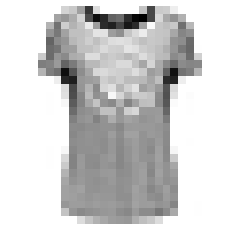

In [48]:
plt.imshow(X_train[1], cmap="binary")
plt.axis('off')
plt.show()

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
class_names[y_train[1]]

'T-shirt/top'

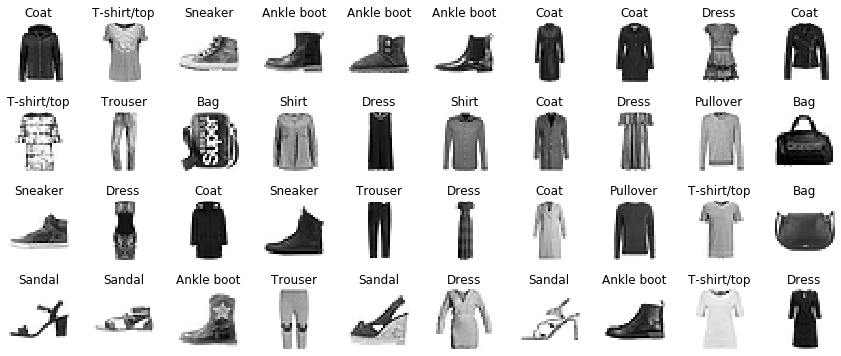

In [8]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
#         print(n_cols, " * ", row, " + ", col, " = ", index)
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [49]:
# Model
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
# model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [50]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_19 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [52]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 24s 437us/sample - loss: 0.7151 - accuracy: 0.7682 - val_loss: 0.5027 - val_accuracy: 0.8264
Epoch 2/30
55000/55000 [==============================] - 19s 346us/sample - loss: 0.4929 - accuracy: 0.8298 - val_loss: 0.4768 - val_accuracy: 0.8338
Epoch 3/30
55000/55000 [==============================] - 19s 348us/sample - loss: 0.4474 - accuracy: 0.8452 - val_loss: 0.4278 - val_accuracy: 0.8490
Epoch 4/30
55000/55000 [==============================] - 18s 333us/sample - loss: 0.4198 - accuracy: 0.8527 - val_loss: 0.3973 - val_accuracy: 0.8672
Epoch 5/30
55000/55000 [==============================] - 19s 348us/sample - loss: 0.3998 - accuracy: 0.8609 - val_loss: 0.3852 - val_accuracy: 0.8690
Epoch 6/30
55000/55000 [==============================] - 19s 354us/sample - loss: 0.3822 - accuracy: 0.8656 - val_loss: 0.4004 - val_accuracy: 0.8630
Epoch 7/30
55000/55000 [=====================

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [15]:
history.params

{'batch_size': 32,
 'epochs': 50,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [16]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.366708836966753, 0.8767]

In [17]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

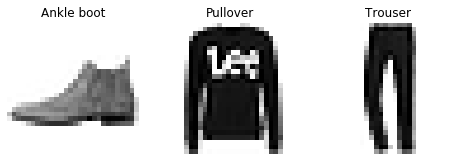

In [19]:
plt.figure(figsize=(8, 4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [20]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [21]:
type(history.epoch)

list

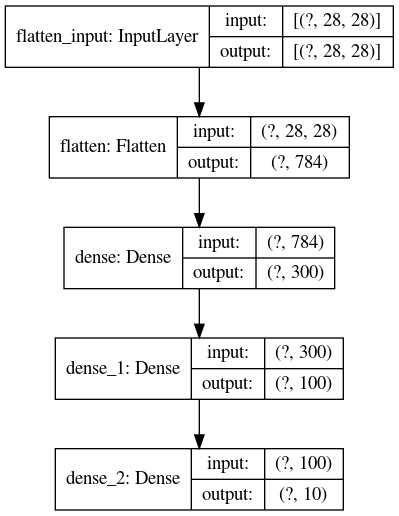

In [22]:
keras.utils.plot_model(model, "mnist.png", show_shapes=True)

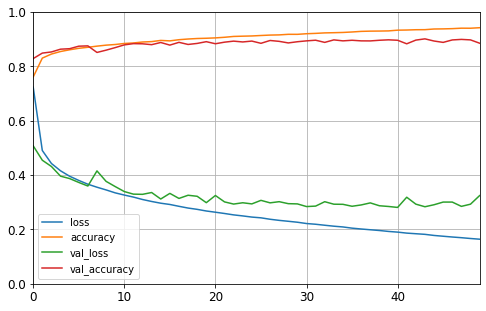

In [23]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Regression Models

In [123]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [124]:
california_housing = fetch_california_housing()

In [125]:
california_housing.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [126]:
california_housing.data.shape

(20640, 8)

In [127]:
X_train_full, X_test, y_train_full, y_test = train_test_split(california_housing.data, 
                                                              california_housing.target,
                                                             random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, 
                                                      y_train_full,
                                                     random_state=42)

In [128]:
X_train.shape

(11610, 8)

In [129]:
X_test.shape

(5160, 8)

In [130]:
X_train_full.shape

(15480, 8)

In [131]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [33]:
np.random.seed(42)
tf.random.set_seed(42)

In [34]:
# X_train.shape[1:]

# model = keras.models.Sequential([
#     keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
#     keras.layers.Dense(1)
# ])

# model.summary()

# model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
# history = model.fit(X_train, y_train, epochs=20,
#                    validation_data=(X_valid, y_valid))

In [35]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

In [36]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [37]:
reg_model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
reg_model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = reg_model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 3s 261us/sample - loss: 1.6321 - val_loss: 1.5903
Epoch 2/20
11610/11610 [==============================] - 2s 192us/sample - loss: 0.7124 - val_loss: 0.6539
Epoch 3/20
11610/11610 [==============================] - 2s 161us/sample - loss: 0.6348 - val_loss: 0.6039
Epoch 4/20
11610/11610 [==============================] - 2s 181us/sample - loss: 0.5983 - val_loss: 0.5738
Epoch 5/20
11610/11610 [==============================] - 2s 215us/sample - loss: 0.5713 - val_loss: 0.5406
Epoch 6/20
11610/11610 [==============================] - 2s 187us/sample - loss: 0.5482 - val_loss: 0.5221
Epoch 7/20
11610/11610 [==============================] - 2s 187us/sample - loss: 0.5298 - val_loss: 0.4965
Epoch 8/20
11610/11610 [==============================] - 2s 181us/sample - loss: 0.5138 - val_loss: 0.4843
Epoch 9/20
11610/11610 [==============================] - 2s 194us/sample - loss: 0.500

In [38]:
mse_test = reg_model.evaluate(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [39]:
X_new = X_test[:3]
y_pred = reg_model.predict(X_new)

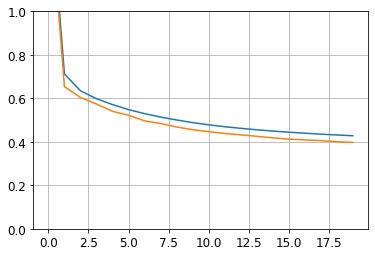

In [40]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [41]:
np.random.seed(42)
tf.random.set_seed(42)

In [42]:
# Wide & Deep!
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model_WD = keras.models.Model(inputs=[input_], outputs=[output])

In [43]:
model_WD.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [44]:
model_WD.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model_WD.fit(X_train, y_train, epochs=20,
                      validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 3s 231us/sample - loss: 1.2474 - val_loss: 0.8727
Epoch 2/20
11610/11610 [==============================] - 2s 214us/sample - loss: 0.6341 - val_loss: 0.8881
Epoch 3/20
11610/11610 [==============================] - 3s 224us/sample - loss: 0.5885 - val_loss: 0.5573
Epoch 4/20
11610/11610 [==============================] - 2s 196us/sample - loss: 0.5599 - val_loss: 0.5238
Epoch 5/20
11610/11610 [==============================] - 2s 178us/sample - loss: 0.5367 - val_loss: 0.6201
Epoch 6/20
11610/11610 [==============================] - 2s 168us/sample - loss: 0.5170 - val_loss: 0.4979
Epoch 7/20
11610/11610 [==============================] - 2s 174us/sample - loss: 0.5022 - val_loss: 0.5240
Epoch 8/20
11610/11610 [==============================] - 3s 231us/sample - loss: 0.4885 - val_loss: 0.4538
Epoch 9/20
11610/11610 [==============================] - 3s 297us/sample - loss: 0.477

In [45]:
mse_test = model_WD.evaluate(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [46]:
np.random.seed(42)
tf.random.set_seed(42)

In [47]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="ouput")(concat)
model_SWD = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [48]:
model_SWD.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           930         dense_8[0][0]                    
____________________________________________________________________________________________

In [49]:
model_SWD.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [50]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:] 
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model_SWD.fit((X_train_A, X_train_B), y_train, epochs=20,
                       validation_data=((X_valid_A, X_valid_B), y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 3s 264us/sample - loss: 1.8095 - val_loss: 1.4409
Epoch 2/20
11610/11610 [==============================] - 2s 214us/sample - loss: 0.6798 - val_loss: 0.6123
Epoch 3/20
11610/11610 [==============================] - 2s 203us/sample - loss: 0.5957 - val_loss: 0.5618
Epoch 4/20
11610/11610 [==============================] - 3s 250us/sample - loss: 0.5580 - val_loss: 0.5514
Epoch 5/20
11610/11610 [==============================] - 3s 226us/sample - loss: 0.5331 - val_loss: 0.5073
Epoch 6/20
11610/11610 [==============================] - 2s 214us/sample - loss: 0.5124 - val_loss: 0.4860
Epoch 7/20
11610/11610 [==============================] - 3s 216us/sample - loss: 0.4972 - val_loss: 0.4631
Epoch 8/20
11610/11610 [==============================] - 3s 300us/sample - loss: 0.4834 - val_loss: 0.4514
Epoch 9/20
11610/11610 [==============================] - 3s 225us/sample - loss: 0.474

In [51]:
mse_test = model_SWD.evaluate((X_test_A, X_test_B), y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Adding an Aux output for regularization:

In [52]:
np.random.seed(42)
tf.random.set_seed(42)

In [53]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model_aux = keras.models.Model(inputs=[input_A, input_B],
                              outputs=[output, aux_output])

In [54]:
model_aux.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [55]:
history = model_aux.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                       validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 4s 348us/sample - loss: 2.1329 - main_output_loss: 1.9166 - aux_output_loss: 4.0719 - val_loss: 2.2885 - val_main_output_loss: 1.5657 - val_aux_output_loss: 8.7861
Epoch 2/20
11610/11610 [==============================] - 4s 322us/sample - loss: 0.8910 - main_output_loss: 0.6989 - aux_output_loss: 2.6202 - val_loss: 1.4258 - val_main_output_loss: 0.6285 - val_aux_output_loss: 8.5972
Epoch 3/20
11610/11610 [==============================] - 3s 218us/sample - loss: 0.7397 - main_output_loss: 0.6064 - aux_output_loss: 1.9374 - val_loss: 1.3894 - val_main_output_loss: 0.5941 - val_aux_output_loss: 8.5417
Epoch 4/20
11610/11610 [==============================] - 2s 208us/sample - loss: 0.6746 - main_output_loss: 0.5684 - aux_output_loss: 1.6301 - val_loss: 1.3275 - val_main_output_loss: 0.6028 - val_aux_output_loss: 7.8451
Epoch 5/20
11610/11610 [==============================] - 3s 22

In [56]:
total_loss, main_loss, aux_loss = model_aux.evaluate([X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model_aux.predict([X_new_A, X_new_B])

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

# The Subclassing API

In [81]:
from tensorflow.keras.layers import Dense, concatenate

class DeepAndWide(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = Dense(units, activation=activation)
        self.hidden2 = Dense(units, activation=activation)
        self.main_output = Dense(1)
        self.aux_output = Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = concatenate([hidden2, input_A])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model_class = DeepAndWide(30, activation="relu")

In [82]:
model_class.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model_class.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_los, aux_loss = model_class.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model_class.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 6s 548us/sample - loss: 2.5294 - output_1_loss: 2.3052 - output_2_loss: 4.5373 - val_loss: 3.8172 - val_output_1_loss: 3.3986 - val_output_2_loss: 7.5687
Epoch 2/10
11610/11610 [==============================] - 5s 472us/sample - loss: 0.9332 - output_1_loss: 0.7203 - output_2_loss: 2.8494 - val_loss: 1.3417 - val_output_1_loss: 0.6409 - val_output_2_loss: 7.6450
Epoch 3/10
11610/11610 [==============================] - 3s 294us/sample - loss: 0.7616 - output_1_loss: 0.6211 - output_2_loss: 2.0245 - val_loss: 1.2630 - val_output_1_loss: 0.5849 - val_output_2_loss: 7.3610
Epoch 4/10
11610/11610 [==============================] - 3s 263us/sample - loss: 0.6865 - output_1_loss: 0.5815 - output_2_loss: 1.6301 - val_loss: 1.1397 - val_output_1_loss: 0.5639 - val_output_2_loss: 6.3177
Epoch 5/10
11610/11610 [==============================] - 4s 333us/sample - loss: 0.6390 - output_1_los

In [84]:
model.save("deepone_model.h5")

In [85]:
saved_model = keras.models.load_model("deepone_model.h5")

In [86]:
type(saved_model)

tensorflow.python.keras.engine.sequential.Sequential

# Saving and Restoring Models

In [110]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [132]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [133]:
modela = keras.models.Sequential([
    Dense(30, activation="relu", input_shape=[8]),
    Dense(30, activation="relu"),
    Dense(1)
])

In [134]:
modela.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = modela.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = modela.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 4s 351us/sample - loss: 1.9977 - val_loss: 0.8444
Epoch 2/10
11610/11610 [==============================] - 2s 215us/sample - loss: 0.7745 - val_loss: 0.8197
Epoch 3/10
11610/11610 [==============================] - 3s 218us/sample - loss: 0.6668 - val_loss: 0.9477
Epoch 4/10
11610/11610 [==============================] - 2s 201us/sample - loss: 0.6106 - val_loss: 0.5887
Epoch 5/10
11610/11610 [==============================] - 2s 166us/sample - loss: 0.5599 - val_loss: 0.7000
Epoch 6/10
11610/11610 [==============================] - 2s 188us/sample - loss: 0.5205 - val_loss: 0.5743
Epoch 7/10
11610/11610 [==============================] - 2s 181us/sample - loss: 0.4935 - val_loss: 0.4476
Epoch 8/10
11610/11610 [==============================] - 2s 173us/sample - loss: 0.4698 - val_loss: 0.4342
Epoch 9/10
11610/11610 [==============================] - 2s 171us/sample - loss: 0.453

In [136]:
modela.save("modela.h5")

In [139]:
model.save_weights("keras_weights.cpkt")

# Using Callbacks during Training

In [140]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [143]:
model =  keras.models.Sequential([
    Dense(30, activation="relu", input_shape=[8]),
    Dense(30, activation="relu"),
    Dense(1)
])

In [145]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("modela.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb])
model = keras.models.load_model("modela.h5")
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 3s 266us/sample - loss: 1.4530 - val_loss: 0.7972
Epoch 2/10
11610/11610 [==============================] - 2s 214us/sample - loss: 0.7402 - val_loss: 0.6640
Epoch 3/10
11610/11610 [==============================] - 2s 183us/sample - loss: 0.6512 - val_loss: 0.6182
Epoch 4/10
11610/11610 [==============================] - 2s 184us/sample - loss: 0.5951 - val_loss: 0.5563
Epoch 5/10
11610/11610 [==============================] - 2s 168us/sample - loss: 0.5534 - val_loss: 0.5014
Epoch 6/10
11610/11610 [==============================] - 2s 181us/sample - loss: 0.5197 - val_loss: 0.4723
Epoch 7/10
11610/11610 [==============================] - 3s 227us/sample - loss: 0.4930 - val_loss: 0.4516
Epoch 8/10
11610/11610 [==============================] - 3s 231us/sample - loss: 0.4724 - val_loss: 0.4380
Epoch 9/10
11610/11610 [==============================] - 3s 233us/sample - loss: 0.455

In [150]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, 
                                                 restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 3s 266us/sample - loss: 0.3226 - val_loss: 0.3767
Epoch 2/100
11610/11610 [==============================] - 3s 238us/sample - loss: 0.3226 - val_loss: 0.3342
Epoch 3/100
11610/11610 [==============================] - 3s 244us/sample - loss: 0.3221 - val_loss: 0.3411
Epoch 4/100
11610/11610 [==============================] - 4s 347us/sample - loss: 0.3218 - val_loss: 0.3496
Epoch 5/100
11610/11610 [==============================] - 4s 320us/sample - loss: 0.3215 - val_loss: 0.3280
Epoch 6/100
11610/11610 [==============================] - 3s 244us/sample - loss: 0.3213 - val_loss: 0.3573
Epoch 7/100
11610/11610 [==============================] - 3s 243us/sample - loss: 0.3208 - val_loss: 0.3177
Epoch 8/100
11610/11610 [==============================] - 3s 247us/sample - loss: 0.3205 - val_loss: 0.3675
Epoch 9/100
11610/11610 [==============================] - 3s 270us/sample - lo

In [151]:
class ValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [152]:
val_train_ratio_cb = ValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=5,
                   validation_data=(X_valid, y_valid),
                   callbacks=[val_train_ratio_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/5
11520/11610 [============================>.] - ETA: 0s - loss: 0.3198
val/train: 1.16
11610/11610 [==============================] - 3s 217us/sample - loss: 0.3205 - val_loss: 0.3709
Epoch 2/5
11456/11610 [============================>.] - ETA: 0s - loss: 0.3217
val/train: 1.05
11610/11610 [==============================] - 2s 200us/sample - loss: 0.3204 - val_loss: 0.3368
Epoch 3/5
11552/11610 [============================>.] - ETA: 0s - loss: 0.3198
val/train: 1.06
11610/11610 [==============================] - 3s 246us/sample - loss: 0.3200 - val_loss: 0.3405
Epoch 4/5
11424/11610 [============================>.] - ETA: 0s - loss: 0.3212
val/train: 1.09
11610/11610 [==============================] - 3s 242us/sample - loss: 0.3197 - val_loss: 0.3475
Epoch 5/5
11456/11610 [============================>.] - ETA: 0s - loss: 0.3204
val/train: 1.00
11610/11610 [==============================] - 3s 257us/sample - loss: 0.3194 - val

# TensorBoard

In [153]:
root_logdir = os.path.join(os.curdir, "tensor_logs")

In [154]:
root_logdir

'./tensor_logs'

In [155]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./tensor_logs/run_2020_01_22-16_02_23'

In [161]:
type(get_run_logdir)

function

In [156]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [158]:
model = keras.models.Sequential([
    Dense(30, activation="relu", input_shape=[8]),
    Dense(30, activation="relu"),
    Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [162]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb, tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 3s 217us/sample - loss: 0.3788 - val_loss: 0.4105
Epoch 2/30
11610/11610 [==============================] - 3s 247us/sample - loss: 0.3777 - val_loss: 0.3772
Epoch 3/30
11610/11610 [==============================] - 3s 226us/sample - loss: 0.3763 - val_loss: 0.3809
Epoch 4/30
11610/11610 [==============================] - 3s 256us/sample - loss: 0.3752 - val_loss: 0.3828
Epoch 5/30
11610/11610 [==============================] - 3s 236us/sample - loss: 0.3741 - val_loss: 0.3678
Epoch 6/30
11610/11610 [==============================] - 3s 301us/sample - loss: 0.3726 - val_loss: 0.3926
Epoch 7/30
11610/11610 [==============================] - 2s 209us/sample - loss: 0.3715 - val_loss: 0.3686
Epoch 8/30
11610/11610 [==============================] - 3s 217us/sample - loss: 0.3705 - val_loss: 0.4063
Epoch 9/30
11610/11610 [==============================] - 3s 256us/sample - loss: 0.370

In [163]:
%load_ext tensorboard
%tensorboard --logdir=./tensor_logs --port=6007

In [164]:
run_logdir2 = get_run_logdir()
run_logdir2

'./tensor_logs/run_2020_01_22-16_40_44'

In [165]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [166]:
model = keras.models.Sequential([
    Dense(30, activation="relu", input_shape=[8]),
    Dense(30, activation="relu"),
    Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [167]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb, tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 6s 505us/sample - loss: 0.7860 - val_loss: 3.9608
Epoch 2/30
11610/11610 [==============================] - 3s 236us/sample - loss: 0.4406 - val_loss: 19.3300
Epoch 3/30
11610/11610 [==============================] - 3s 227us/sample - loss: 0.3807 - val_loss: 1.9256
Epoch 4/30
11610/11610 [==============================] - 3s 255us/sample - loss: 0.4055 - val_loss: 0.3552
Epoch 5/30
11610/11610 [==============================] - 3s 267us/sample - loss: 0.3706 - val_loss: 0.3235
Epoch 6/30
11610/11610 [==============================] - 3s 276us/sample - loss: 0.3641 - val_loss: 0.3160
Epoch 7/30
11610/11610 [==============================] - 3s 285us/sample - loss: 0.3504 - val_loss: 0.3156
Epoch 8/30
11610/11610 [==============================] - 3s 239us/sample - loss: 0.3393 - val_loss: 13.7286
Epoch 9/30
11610/11610 [==============================] - 3s 223us/sample - loss: 0.3

In [169]:
%load_ext tensorboard
%tensorboard --logdir=./tensor_logs --port=6007

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6007 (pid 20801), started 0:15:19 ago. (Use '!kill 20801' to kill it.)

# Hyperparameter Tuning

In [170]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [171]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(Dense(n_neurons, activation="relu"))
    model.add(Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [172]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [173]:
type(keras_reg)

tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor

In [174]:
keras_reg.fit(X_train, y_train, epochs=100,
             validation_data=(X_valid, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 5s 450us/sample - loss: 1.1815 - val_loss: 20.7837
Epoch 2/100
11610/11610 [==============================] - 3s 249us/sample - loss: 0.7013 - val_loss: 0.6646
Epoch 3/100
11610/11610 [==============================] - 3s 263us/sample - loss: 0.5197 - val_loss: 0.5974
Epoch 4/100
11610/11610 [==============================] - 3s 224us/sample - loss: 0.4811 - val_loss: 0.5292
Epoch 5/100
11610/11610 [==============================] - 2s 203us/sample - loss: 0.4565 - val_loss: 0.4813
Epoch 6/100
11610/11610 [==============================] - 3s 215us/sample - loss: 0.4393 - val_loss: 0.4501
Epoch 7/100
11610/11610 [==============================] - 2s 204us/sample - loss: 0.4283 - val_loss: 0.4231
Epoch 8/100
11610/11610 [==============================] - 2s 196us/sample - loss: 0.4205 - val_loss: 0.4072
Epoch 9/100
11610/11610 [==============================] - 3s 245us/sample - l

In [175]:
mse_test = keras_reg.score(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [176]:
y_pred = keras_reg.predict(X_new)

In [177]:
np.random.seed(42)
tf.random.set_seed(42)

In [178]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

In [179]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                 validation_data=(X_valid, y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15 ....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 3s 372us/sample - loss: 3.5564 - val_loss: 1.8584
Epoch 2/100
7740/7740 [==============================] - 0s 60us/sample - loss: 1.3350 - val_loss: 0.9421
Epoch 3/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.8579 - val_loss: 0.7273
Epoch 4/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.7340 - val_loss: 0.9321
Epoch 5/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.6951 - val_loss: 0.6364
Epoch 6/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.6682 - val_loss: 0.8188
Epoch 7/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.6526 - val_loss: 0.7451
Epoch 8/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.6386 - val_loss: 0.6280
Epoch 9/100
7740/7740 [==============================] - 1s 77us/sample - loss: 0.6251 - val_loss: 0.69

[CV]  learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15, total=  17.7s
[CV] learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.7s remaining:    0.0s


7740/7740 [==============================] - 2s 306us/sample - loss: 3.5557 - val_loss: 23.2477
Epoch 2/100
7740/7740 [==============================] - 1s 69us/sample - loss: 1.4772 - val_loss: 10.8630
Epoch 3/100
7740/7740 [==============================] - 1s 92us/sample - loss: 1.0155 - val_loss: 4.4730
Epoch 4/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.8734 - val_loss: 1.5265
Epoch 5/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.8032 - val_loss: 0.7206
Epoch 6/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.7550 - val_loss: 1.1635
Epoch 7/100
7740/7740 [==============================] - 1s 70us/sample - loss: 0.7167 - val_loss: 2.4032
Epoch 8/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.6855 - val_loss: 4.0540
Epoch 9/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.6591 - val_loss: 5.9448
Epoch 10/100
7740/7740 [==============================]

[CV]  learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15, total=   9.8s
[CV] learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 121us/sample - loss: 3.2689 - val_loss: 1.3818
Epoch 2/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.9650 - val_loss: 0.7308
Epoch 3/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.6171 - val_loss: 0.5392
Epoch 4/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.5491 - val_loss: 0.5124
Epoch 5/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.5355 - val_loss: 0.5908
Epoch 6/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.5310 - val_loss: 0.7897
Epoch 7/100
7740/7740 [==============================] - 1s 82us/sample - loss: 0.5344 - val_loss: 0.5654
Epoch 8/100
7740/7740 [==============================] -

[CV]  learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15, total=   9.7s
[CV] learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 102us/sample - loss: 1.4462 - val_loss: 5.1308
Epoch 2/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.6498 - val_loss: 12.7918
Epoch 3/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.6009 - val_loss: 0.5573
Epoch 4/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5603 - val_loss: 2.6121
Epoch 5/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.6319 - val_loss: 151.6782
Epoch 6/100
7740/7740 [==============================] - 0s 57us/sample - loss: 1.7132 - val_loss: 528.7362
Epoch 7/100
7740/7740 [==============================] - 0s 60us/sample - loss: 6.1401 - val_loss: 2334.6831
Epoch 8/100
7740/7740 [=========================

[CV]  learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21, total=   6.8s
[CV] learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 120us/sample - loss: 1.1692 - val_loss: 23.5191
Epoch 2/100
7740/7740 [==============================] - 1s 78us/sample - loss: 0.5356 - val_loss: 22.9158
Epoch 3/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.5234 - val_loss: 22.1786
Epoch 4/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.5157 - val_loss: 22.7104
Epoch 5/100
7740/7740 [==============================] - 1s 70us/sample - loss: 0.5119 - val_loss: 19.5439
Epoch 6/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.5085 - val_loss: 17.4588
Epoch 7/100
7740/7740 [==============================] - 1s 80us/sample - loss: 0.5065 - val_loss: 19.9278
Epoch 8/100
7740/7740 [==========================

[CV]  learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21, total=   9.2s
[CV] learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 136us/sample - loss: 1.4012 - val_loss: 22.6568
Epoch 2/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.8933 - val_loss: 74.3529
Epoch 3/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.6764 - val_loss: 35.7059
Epoch 4/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.8437 - val_loss: 237.3451
Epoch 5/100
7740/7740 [==============================] - 0s 59us/sample - loss: 3.7140 - val_loss: 400.4510
Epoch 6/100
7740/7740 [==============================] - 1s 77us/sample - loss: 11.2961 - val_loss: 689.5321
Epoch 7/100
7740/7740 [==============================] - 1s 82us/sample - loss: 3.4443 - val_loss: 1111.7937
Epoch 8/100
7740/7740 [====================

[CV]  learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21, total=   6.5s
[CV] learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 3s 429us/sample - loss: 2.4633 - val_loss: 5.9456
Epoch 2/100
7740/7740 [==============================] - 2s 305us/sample - loss: 1.1215 - val_loss: 1.4347
Epoch 3/100
7740/7740 [==============================] - 2s 241us/sample - loss: 0.8125 - val_loss: 0.8367
Epoch 4/100
7740/7740 [==============================] - 2s 269us/sample - loss: 0.7208 - val_loss: 0.6798
Epoch 5/100
7740/7740 [==============================] - 1s 189us/sample - loss: 0.6788 - val_loss: 0.6425
Epoch 6/100
7740/7740 [==============================] - 2s 274us/sample - loss: 0.6498 - val_loss: 0.6208
Epoch 7/100
7740/7740 [==============================] - 2s 301us/sample - loss: 0.6262 - val_loss: 0.5985
Epoch 8/100
7740/7740 [===========================

7740/7740 [==============================] - 2s 290us/sample - loss: 0.3541 - val_loss: 0.3570
Epoch 76/100
7740/7740 [==============================] - 2s 291us/sample - loss: 0.3535 - val_loss: 0.3577
Epoch 77/100
7740/7740 [==============================] - 2s 283us/sample - loss: 0.3528 - val_loss: 0.3834
Epoch 78/100
7740/7740 [==============================] - 2s 321us/sample - loss: 0.3522 - val_loss: 0.3698
Epoch 79/100
7740/7740 [==============================] - 2s 303us/sample - loss: 0.3517 - val_loss: 0.3741
Epoch 80/100
7740/7740 [==============================] - 2s 310us/sample - loss: 0.3510 - val_loss: 0.3835
Epoch 81/100
7740/7740 [==============================] - 2s 304us/sample - loss: 0.3505 - val_loss: 0.3608
Epoch 82/100
7740/7740 [==============================] - 2s 308us/sample - loss: 0.3498 - val_loss: 0.3637
Epoch 83/100
7740/7740 [==============================] - 3s 325us/sample - loss: 0.3494 - val_loss: 0.3600
Epoch 84/100
7740/7740 [=================

[CV]  learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87, total= 3.2min
[CV] learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 4s 462us/sample - loss: 2.7684 - val_loss: 18.4083
Epoch 2/100
7740/7740 [==============================] - 3s 373us/sample - loss: 1.1143 - val_loss: 15.3327
Epoch 3/100
7740/7740 [==============================] - 3s 368us/sample - loss: 0.8059 - val_loss: 11.0646
Epoch 4/100
7740/7740 [==============================] - 3s 400us/sample - loss: 0.7051 - val_loss: 8.1681
Epoch 5/100
7740/7740 [==============================] - 3s 377us/sample - loss: 0.6574 - val_loss: 6.1023
Epoch 6/100
7740/7740 [==============================] - 2s 294us/sample - loss: 0.6258 - val_loss: 4.6822
Epoch 7/100
7740/7740 [==============================] - 2s 279us/sample - loss: 0.6006 - val_loss: 3.6827
Epoch 8/100
7740/7740 [=======================

[CV]  learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87, total= 1.4min
[CV] learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 3s 337us/sample - loss: 2.8290 - val_loss: 4.4146
Epoch 2/100
7740/7740 [==============================] - 2s 261us/sample - loss: 1.1367 - val_loss: 1.1500
Epoch 3/100
7740/7740 [==============================] - 2s 194us/sample - loss: 0.8424 - val_loss: 0.8068
Epoch 4/100
7740/7740 [==============================] - 2s 211us/sample - loss: 0.7625 - val_loss: 0.7274
Epoch 5/100
7740/7740 [==============================] - 2s 259us/sample - loss: 0.7218 - val_loss: 0.6908
Epoch 6/100
7740/7740 [==============================] - 2s 236us/sample - loss: 0.6927 - val_loss: 0.6563
Epoch 7/100
7740/7740 [==============================] - 2s 196us/sample - loss: 0.6683 - val_loss: 0.6336
Epoch 8/100
7740/7740 [==========================

7740/7740 [==============================] - 2s 267us/sample - loss: 0.3675 - val_loss: 0.3763
Epoch 76/100
7740/7740 [==============================] - 2s 302us/sample - loss: 0.3668 - val_loss: 0.3799
Epoch 77/100
7740/7740 [==============================] - 3s 345us/sample - loss: 0.3662 - val_loss: 0.3792
Epoch 78/100
7740/7740 [==============================] - 3s 402us/sample - loss: 0.3657 - val_loss: 0.3892
Epoch 79/100
7740/7740 [==============================] - 3s 362us/sample - loss: 0.3652 - val_loss: 0.3812
Epoch 80/100
7740/7740 [==============================] - 3s 374us/sample - loss: 0.3646 - val_loss: 0.3764
Epoch 81/100
7740/7740 [==============================] - 2s 315us/sample - loss: 0.3639 - val_loss: 0.3871
3870/1 [=========================================================================================================================================================================================================================================================

[CV]  learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87, total= 2.9min
[CV] learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 3s 406us/sample - loss: 2.3816 - val_loss: 14.5443
Epoch 2/100
7740/7740 [==============================] - 2s 241us/sample - loss: 1.2100 - val_loss: 5.8430
Epoch 3/100
7740/7740 [==============================] - 2s 230us/sample - loss: 0.9043 - val_loss: 4.3275
Epoch 4/100
7740/7740 [==============================] - 2s 276us/sample - loss: 0.8113 - val_loss: 3.4674
Epoch 5/100
7740/7740 [==============================] - 2s 265us/sample - loss: 0.7714 - val_loss: 2.7485
Epoch 6/100
7740/7740 [==============================] - 2s 308us/sample - loss: 0.7425 - val_loss: 2.3965
Epoch 7/100
7740/7740 [==============================] - 3s 415us/sample - loss: 0.7204 - val_loss: 2.1100
Epoch 8/100
7740/7740 [=========================

[CV]  learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24, total= 2.8min
[CV] learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 3s 367us/sample - loss: 3.7588 - val_loss: 28.7992
Epoch 2/100
7740/7740 [==============================] - 2s 301us/sample - loss: 2.0541 - val_loss: 42.6182
Epoch 3/100
7740/7740 [==============================] - 2s 244us/sample - loss: 1.6147 - val_loss: 37.3708
Epoch 4/100
7740/7740 [==============================] - 2s 272us/sample - loss: 1.3635 - val_loss: 28.7112
Epoch 5/100
7740/7740 [==============================] - 2s 240us/sample - loss: 1.1710 - val_loss: 20.3691
Epoch 6/100
7740/7740 [==============================] - 2s 263us/sample - loss: 1.0281 - val_loss: 14.3878
Epoch 7/100
7740/7740 [==============================] - 2s 228us/sample - loss: 0.9283 - val_loss: 10.6283
Epoch 8/100
7740/7740 [===================

[CV]  learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24, total= 1.0min
[CV] learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 3s 365us/sample - loss: 2.9155 - val_loss: 4.8947
Epoch 2/100
7740/7740 [==============================] - 2s 233us/sample - loss: 1.2940 - val_loss: 3.0524
Epoch 3/100
7740/7740 [==============================] - 2s 211us/sample - loss: 0.9739 - val_loss: 1.9077
Epoch 4/100
7740/7740 [==============================] - 1s 176us/sample - loss: 0.8515 - val_loss: 1.3465
Epoch 5/100
7740/7740 [==============================] - 1s 176us/sample - loss: 0.7859 - val_loss: 0.9787
Epoch 6/100
7740/7740 [==============================] - 2s 212us/sample - loss: 0.7436 - val_loss: 0.7981
Epoch 7/100
7740/7740 [==============================] - 1s 183us/sample - loss: 0.7132 - val_loss: 0.7103
Epoch 8/100
7740/7740 [==========================

7740/7740 [==============================] - 2s 213us/sample - loss: 0.4069 - val_loss: 0.4311
Epoch 76/100
7740/7740 [==============================] - 2s 275us/sample - loss: 0.4062 - val_loss: 0.4284
Epoch 77/100
7740/7740 [==============================] - 3s 346us/sample - loss: 0.4055 - val_loss: 0.4249
Epoch 78/100
7740/7740 [==============================] - 2s 238us/sample - loss: 0.4047 - val_loss: 0.4280
Epoch 79/100
7740/7740 [==============================] - 2s 259us/sample - loss: 0.4041 - val_loss: 0.4235
Epoch 80/100
7740/7740 [==============================] - 2s 290us/sample - loss: 0.4033 - val_loss: 0.4186
Epoch 81/100
7740/7740 [==============================] - 2s 301us/sample - loss: 0.4025 - val_loss: 0.4228
Epoch 82/100
7740/7740 [==============================] - 2s 263us/sample - loss: 0.4019 - val_loss: 0.4225
Epoch 83/100
7740/7740 [==============================] - 2s 257us/sample - loss: 0.4011 - val_loss: 0.4265
Epoch 84/100
7740/7740 [=================

[CV]  learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24, total= 3.4min
[CV] learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2 .....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 118us/sample - loss: 2.1242 - val_loss: 27.5149
Epoch 2/100
7740/7740 [==============================] - 0s 59us/sample - loss: 1.0018 - val_loss: 131.2477
Epoch 3/100
7740/7740 [==============================] - 0s 60us/sample - loss: 1.4620 - val_loss: 194.3881
Epoch 4/100
7740/7740 [==============================] - 0s 59us/sample - loss: 4.2615 - val_loss: 400.2871
Epoch 5/100
7740/7740 [==============================] - 0s 60us/sample - loss: 2.5353 - val_loss: 686.7748
Epoch 6/100
7740/7740 [==============================] - 0s 57us/sample - loss: 8.5730 - val_loss: 1577.7276
Epoch 7/100
7740/7740 [==============================] - 0s 59us/sample - loss: 13.6798 - val_loss: 3490.3869
Epoch 8/100
7740/7740 [================

[CV]  learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2, total=   5.7s
[CV] learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2 .....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 118us/sample - loss: 1.4717 - val_loss: 13.8555
Epoch 2/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5772 - val_loss: 17.0247
Epoch 3/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.5518 - val_loss: 18.8021
Epoch 4/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.5369 - val_loss: 20.2835
Epoch 5/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.5277 - val_loss: 19.3474
Epoch 6/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5205 - val_loss: 18.4462
Epoch 7/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5158 - val_loss: 19.6960
Epoch 8/100
7740/7740 [===========================

[CV]  learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2, total=   5.7s
[CV] learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2 .....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 106us/sample - loss: 1.9040 - val_loss: 1.7294
Epoch 2/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.5866 - val_loss: 0.8622
Epoch 3/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.6039 - val_loss: 12.8725
Epoch 4/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.5834 - val_loss: 1.4582
Epoch 5/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.6221 - val_loss: 3.3088
Epoch 6/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5511 - val_loss: 11.6689
Epoch 7/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.7116 - val_loss: 29.9577
Epoch 8/100
7740/7740 [==============================]

[CV]  learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2, total=   6.1s
[CV] learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 3s 334us/sample - loss: 1.2466 - val_loss: 39.3874
Epoch 2/100
7740/7740 [==============================] - 2s 261us/sample - loss: 0.9034 - val_loss: 356.6108
Epoch 3/100
7740/7740 [==============================] - 2s 236us/sample - loss: 1.9792 - val_loss: 0.7164
Epoch 4/100
7740/7740 [==============================] - 2s 223us/sample - loss: 0.4649 - val_loss: 0.4108
Epoch 5/100
7740/7740 [==============================] - 2s 233us/sample - loss: 0.4134 - val_loss: 1.0029
Epoch 6/100
7740/7740 [==============================] - 2s 250us/sample - loss: 0.3971 - val_loss: 1.1990
Epoch 7/100
7740/7740 [==============================] - 2s 267us/sample - loss: 0.4032 - val_loss: 5.3810
Epoch 8/100
7740/7740 [=========================

[CV]  learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38, total=  39.4s
[CV] learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 301us/sample - loss: 0.8880 - val_loss: 2.6958
Epoch 2/100
7740/7740 [==============================] - 2s 235us/sample - loss: 0.5231 - val_loss: 0.4678
Epoch 3/100
7740/7740 [==============================] - 2s 246us/sample - loss: 0.4631 - val_loss: 0.4749
Epoch 4/100
7740/7740 [==============================] - 2s 263us/sample - loss: 0.4359 - val_loss: 0.4024
Epoch 5/100
7740/7740 [==============================] - 2s 226us/sample - loss: 0.4209 - val_loss: 0.4751
Epoch 6/100
7740/7740 [==============================] - 2s 206us/sample - loss: 0.4118 - val_loss: 0.4977
Epoch 7/100
7740/7740 [==============================] - 2s 215us/sample - loss: 0.4057 - val_loss: 0.7345
Epoch 8/100
7740/7740 [===========================

[CV]  learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38, total=  28.1s
[CV] learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 3s 336us/sample - loss: 1.1476 - val_loss: 19.1236
Epoch 2/100
7740/7740 [==============================] - 2s 218us/sample - loss: 0.6004 - val_loss: 43.3496
Epoch 3/100
7740/7740 [==============================] - 2s 207us/sample - loss: 0.6625 - val_loss: 23.9919
Epoch 4/100
7740/7740 [==============================] - 2s 211us/sample - loss: 0.6275 - val_loss: 2.5008
Epoch 5/100
7740/7740 [==============================] - 2s 219us/sample - loss: 0.4657 - val_loss: 0.4522
Epoch 6/100
7740/7740 [==============================] - 2s 227us/sample - loss: 0.4227 - val_loss: 0.4120
Epoch 7/100
7740/7740 [==============================] - 2s 247us/sample - loss: 0.4121 - val_loss: 0.3991
Epoch 8/100
7740/7740 [========================

7740/7740 [==============================] - 2s 209us/sample - loss: 0.3243 - val_loss: 0.3106
Epoch 76/100
7740/7740 [==============================] - 2s 199us/sample - loss: 0.3239 - val_loss: 0.3187
Epoch 77/100
7740/7740 [==============================] - 2s 201us/sample - loss: 0.3232 - val_loss: 0.3215
Epoch 78/100
7740/7740 [==============================] - 2s 230us/sample - loss: 0.3219 - val_loss: 0.3222
Epoch 79/100
7740/7740 [==============================] - 2s 195us/sample - loss: 0.3237 - val_loss: 0.3230
Epoch 80/100
7740/7740 [==============================] - 1s 169us/sample - loss: 0.3253 - val_loss: 0.3141
Epoch 81/100
7740/7740 [==============================] - 1s 164us/sample - loss: 0.3336 - val_loss: 0.3242
Epoch 82/100
7740/7740 [==============================] - 1s 186us/sample - loss: 0.3212 - val_loss: 0.3090
Epoch 83/100
7740/7740 [==============================] - 2s 250us/sample - loss: 0.3225 - val_loss: 0.3299
Epoch 84/100
7740/7740 [=================

[CV]  learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38, total= 2.8min
[CV] learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21 ..
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 319us/sample - loss: 4.0154 - val_loss: 8.4338
Epoch 2/100
7740/7740 [==============================] - 2s 254us/sample - loss: 2.3190 - val_loss: 7.3895
Epoch 3/100
7740/7740 [==============================] - 2s 238us/sample - loss: 1.6395 - val_loss: 5.5681
Epoch 4/100
7740/7740 [==============================] - 2s 213us/sample - loss: 1.3384 - val_loss: 4.1801
Epoch 5/100
7740/7740 [==============================] - 2s 235us/sample - loss: 1.1802 - val_loss: 2.6829
Epoch 6/100
7740/7740 [==============================] - 2s 242us/sample - loss: 1.0684 - val_loss: 2.1789
Epoch 7/100
7740/7740 [==============================] - 2s 253us/sample - loss: 0.9882 - val_loss: 1.7644
Epoch 8/100
7740/7740 [===========================

7740/7740 [==============================] - 2s 251us/sample - loss: 0.4190 - val_loss: 0.4076
Epoch 76/100
7740/7740 [==============================] - 2s 253us/sample - loss: 0.4173 - val_loss: 0.4059
Epoch 77/100
7740/7740 [==============================] - 2s 241us/sample - loss: 0.4156 - val_loss: 0.4041
Epoch 78/100
7740/7740 [==============================] - 2s 230us/sample - loss: 0.4139 - val_loss: 0.4025
Epoch 79/100
7740/7740 [==============================] - 2s 268us/sample - loss: 0.4123 - val_loss: 0.4010
Epoch 80/100
7740/7740 [==============================] - 2s 219us/sample - loss: 0.4107 - val_loss: 0.4001
Epoch 81/100
7740/7740 [==============================] - 2s 233us/sample - loss: 0.4092 - val_loss: 0.3988
Epoch 82/100
7740/7740 [==============================] - 2s 255us/sample - loss: 0.4076 - val_loss: 0.3986
Epoch 83/100
7740/7740 [==============================] - 2s 232us/sample - loss: 0.4063 - val_loss: 0.3969
Epoch 84/100
7740/7740 [=================

[CV]  learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21, total= 3.5min
[CV] learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21 ..
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 3s 425us/sample - loss: 5.0627 - val_loss: 2.9619
Epoch 2/100
7740/7740 [==============================] - 2s 237us/sample - loss: 2.1420 - val_loss: 5.9065
Epoch 3/100
7740/7740 [==============================] - 2s 264us/sample - loss: 1.2787 - val_loss: 10.6548
Epoch 4/100
7740/7740 [==============================] - 2s 254us/sample - loss: 1.0909 - val_loss: 11.2295
Epoch 5/100
7740/7740 [==============================] - 2s 224us/sample - loss: 1.0057 - val_loss: 9.7659
Epoch 6/100
7740/7740 [==============================] - 2s 240us/sample - loss: 0.9450 - val_loss: 7.9557
Epoch 7/100
7740/7740 [==============================] - 2s 250us/sample - loss: 0.8984 - val_loss: 6.5072
Epoch 8/100
7740/7740 [=======================

[CV]  learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21, total=  54.2s
[CV] learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21 ..
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 3s 329us/sample - loss: 4.4054 - val_loss: 3.5453
Epoch 2/100
7740/7740 [==============================] - 2s 256us/sample - loss: 2.5632 - val_loss: 3.0304
Epoch 3/100
7740/7740 [==============================] - 2s 272us/sample - loss: 1.4056 - val_loss: 2.5104
Epoch 4/100
7740/7740 [==============================] - 2s 297us/sample - loss: 0.9829 - val_loss: 1.7405
Epoch 5/100
7740/7740 [==============================] - 2s 283us/sample - loss: 0.8388 - val_loss: 1.2852
Epoch 6/100
7740/7740 [==============================] - 2s 275us/sample - loss: 0.7690 - val_loss: 0.9827
Epoch 7/100
7740/7740 [==============================] - 2s 269us/sample - loss: 0.7274 - val_loss: 0.8182
Epoch 8/100
7740/7740 [=========================

[CV]  learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21, total= 2.1min
[CV] learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 3s 344us/sample - loss: 1.4786 - val_loss: 32.2154
Epoch 2/100
7740/7740 [==============================] - 2s 292us/sample - loss: 0.8372 - val_loss: 0.6056
Epoch 3/100
7740/7740 [==============================] - 2s 253us/sample - loss: 0.5351 - val_loss: 0.4733
Epoch 4/100
7740/7740 [==============================] - 2s 258us/sample - loss: 0.4868 - val_loss: 0.4441
Epoch 5/100
7740/7740 [==============================] - 2s 274us/sample - loss: 0.4613 - val_loss: 0.4300
Epoch 6/100
7740/7740 [==============================] - 2s 242us/sample - loss: 0.4455 - val_loss: 0.4229
Epoch 7/100
7740/7740 [==============================] - 2s 259us/sample - loss: 0.4345 - val_loss: 0.4182
Epoch 8/100
7740/7740 [========================

[CV]  learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22, total=  35.5s
[CV] learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 3s 354us/sample - loss: 1.2435 - val_loss: 0.6645
Epoch 2/100
7740/7740 [==============================] - 2s 288us/sample - loss: 0.5790 - val_loss: 0.9961
Epoch 3/100
7740/7740 [==============================] - 2s 237us/sample - loss: 0.5141 - val_loss: 1.4106
Epoch 4/100
7740/7740 [==============================] - 2s 275us/sample - loss: 0.4821 - val_loss: 1.3241
Epoch 5/100
7740/7740 [==============================] - 2s 249us/sample - loss: 0.4607 - val_loss: 1.1473
Epoch 6/100
7740/7740 [==============================] - 2s 238us/sample - loss: 0.4442 - val_loss: 0.7063
Epoch 7/100
7740/7740 [==============================] - 2s 215us/sample - loss: 0.4326 - val_loss: 0.5003
Epoch 8/100
7740/7740 [===========================

[CV]  learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22, total=  37.8s
[CV] learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 4s 553us/sample - loss: 1.7713 - val_loss: 42.9949
Epoch 2/100
7740/7740 [==============================] - 2s 262us/sample - loss: 0.8447 - val_loss: 0.5217
Epoch 3/100
7740/7740 [==============================] - 2s 210us/sample - loss: 0.5263 - val_loss: 0.4754
Epoch 4/100
7740/7740 [==============================] - 2s 281us/sample - loss: 0.4931 - val_loss: 0.4464
Epoch 5/100
7740/7740 [==============================] - 2s 230us/sample - loss: 0.4720 - val_loss: 0.4311
Epoch 6/100
7740/7740 [==============================] - 2s 213us/sample - loss: 0.4583 - val_loss: 0.4217
Epoch 7/100
7740/7740 [==============================] - 2s 201us/sample - loss: 0.4483 - val_loss: 0.4149
Epoch 8/100
7740/7740 [==========================

7740/7740 [==============================] - 2s 228us/sample - loss: 0.3547 - val_loss: 0.3520
Epoch 76/100
7740/7740 [==============================] - 2s 225us/sample - loss: 0.3547 - val_loss: 0.3506
Epoch 77/100
7740/7740 [==============================] - 2s 250us/sample - loss: 0.3581 - val_loss: 0.3511
Epoch 78/100
7740/7740 [==============================] - 1s 183us/sample - loss: 0.3544 - val_loss: 0.3502
Epoch 79/100
7740/7740 [==============================] - 1s 193us/sample - loss: 0.3533 - val_loss: 0.3507
Epoch 80/100
7740/7740 [==============================] - 2s 202us/sample - loss: 0.3532 - val_loss: 0.3487
Epoch 81/100
7740/7740 [==============================] - 2s 219us/sample - loss: 0.3560 - val_loss: 0.3511
Epoch 82/100
7740/7740 [==============================] - 2s 233us/sample - loss: 0.3523 - val_loss: 0.3490
Epoch 83/100
7740/7740 [==============================] - 2s 235us/sample - loss: 0.3510 - val_loss: 0.3586
Epoch 84/100
7740/7740 [=================

[CV]  learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22, total= 3.1min
[CV] learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 109us/sample - loss: 7.7183 - val_loss: 42.9974
Epoch 2/100
7740/7740 [==============================] - 0s 57us/sample - loss: 5.5359 - val_loss: 27.4340
Epoch 3/100
7740/7740 [==============================] - 0s 57us/sample - loss: 4.0708 - val_loss: 17.4759
Epoch 4/100
7740/7740 [==============================] - 0s 57us/sample - loss: 3.0666 - val_loss: 11.0630
Epoch 5/100
7740/7740 [==============================] - 0s 56us/sample - loss: 2.3733 - val_loss: 7.0741
Epoch 6/100
7740/7740 [==============================] - 0s 56us/sample - loss: 1.8924 - val_loss: 4.5246
Epoch 7/100
7740/7740 [==============================] - 0s 56us/sample - loss: 1.5539 - val_loss: 2.9484
Epoch 8/100
7740/7740 [=============================

[CV]  learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49, total=  11.3s
[CV] learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 107us/sample - loss: 7.6322 - val_loss: 25.5267
Epoch 2/100
7740/7740 [==============================] - 0s 56us/sample - loss: 5.6958 - val_loss: 23.8046
Epoch 3/100
7740/7740 [==============================] - 0s 57us/sample - loss: 4.3254 - val_loss: 22.6027
Epoch 4/100
7740/7740 [==============================] - 0s 55us/sample - loss: 3.3442 - val_loss: 21.7543
Epoch 5/100
7740/7740 [==============================] - 0s 57us/sample - loss: 2.6354 - val_loss: 21.1529
Epoch 6/100
7740/7740 [==============================] - 0s 57us/sample - loss: 2.1185 - val_loss: 20.7317
Epoch 7/100
7740/7740 [==============================] - 0s 58us/sample - loss: 1.7388 - val_loss: 20.4422
Epoch 8/100
7740/7740 [=========================

[CV]  learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49, total=  10.4s
[CV] learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 112us/sample - loss: 6.1551 - val_loss: 7.6300
Epoch 2/100
7740/7740 [==============================] - 0s 56us/sample - loss: 4.4875 - val_loss: 4.9071
Epoch 3/100
7740/7740 [==============================] - 0s 58us/sample - loss: 3.3694 - val_loss: 3.3167
Epoch 4/100
7740/7740 [==============================] - 0s 57us/sample - loss: 2.6034 - val_loss: 2.3629
Epoch 5/100
7740/7740 [==============================] - 0s 56us/sample - loss: 2.0678 - val_loss: 1.7850
Epoch 6/100
7740/7740 [==============================] - 0s 58us/sample - loss: 1.6876 - val_loss: 1.4380
Epoch 7/100
7740/7740 [==============================] - 0s 56us/sample - loss: 1.4151 - val_loss: 1.2333
Epoch 8/100
7740/7740 [==============================] 

[CV]  learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49, total=  11.8s
[CV] learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 292us/sample - loss: 1.3428 - val_loss: 6.6633
Epoch 2/100
7740/7740 [==============================] - 2s 232us/sample - loss: 0.6725 - val_loss: 27.2674
Epoch 3/100
7740/7740 [==============================] - 2s 235us/sample - loss: 0.7856 - val_loss: 3.9609
Epoch 4/100
7740/7740 [==============================] - 1s 172us/sample - loss: 0.5327 - val_loss: 0.4810
Epoch 5/100
7740/7740 [==============================] - 2s 214us/sample - loss: 0.4455 - val_loss: 0.4217
Epoch 6/100
7740/7740 [==============================] - 2s 220us/sample - loss: 0.4260 - val_loss: 0.4048
Epoch 7/100
7740/7740 [==============================] - 2s 233us/sample - loss: 0.4130 - val_loss: 0.4006
Epoch 8/100
7740/7740 [=========================

7740/7740 [==============================] - 2s 213us/sample - loss: 0.3034 - val_loss: 0.3063
Epoch 76/100
7740/7740 [==============================] - 2s 203us/sample - loss: 0.3024 - val_loss: 0.2997
Epoch 77/100
7740/7740 [==============================] - 2s 230us/sample - loss: 0.3015 - val_loss: 0.4006
Epoch 78/100
7740/7740 [==============================] - 2s 253us/sample - loss: 0.3017 - val_loss: 0.2959
Epoch 79/100
7740/7740 [==============================] - 2s 274us/sample - loss: 0.3002 - val_loss: 0.3516
Epoch 80/100
7740/7740 [==============================] - 2s 289us/sample - loss: 0.2998 - val_loss: 0.3148
Epoch 81/100
7740/7740 [==============================] - 2s 239us/sample - loss: 0.2996 - val_loss: 0.3047
Epoch 82/100
7740/7740 [==============================] - 2s 228us/sample - loss: 0.2985 - val_loss: 0.3050
Epoch 83/100
7740/7740 [==============================] - 2s 293us/sample - loss: 0.2983 - val_loss: 0.3096
Epoch 84/100
7740/7740 [=================

[CV]  learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42, total= 3.2min
[CV] learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 6s 770us/sample - loss: 1.1929 - val_loss: 0.8355
Epoch 2/100
7740/7740 [==============================] - 2s 227us/sample - loss: 0.6051 - val_loss: 0.8527
Epoch 3/100
7740/7740 [==============================] - 2s 227us/sample - loss: 0.5373 - val_loss: 1.2540
Epoch 4/100
7740/7740 [==============================] - 3s 374us/sample - loss: 0.4919 - val_loss: 1.2976
Epoch 5/100
7740/7740 [==============================] - 2s 254us/sample - loss: 0.4619 - val_loss: 0.9909
Epoch 6/100
7740/7740 [==============================] - 2s 222us/sample - loss: 0.4408 - val_loss: 0.6783
Epoch 7/100
7740/7740 [==============================] - 2s 228us/sample - loss: 0.4267 - val_loss: 0.4828
Epoch 8/100
7740/7740 [==========================

[CV]  learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42, total=  39.4s
[CV] learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 297us/sample - loss: 1.1250 - val_loss: 3.1401
Epoch 2/100
7740/7740 [==============================] - 2s 252us/sample - loss: 0.7007 - val_loss: 2.5360
Epoch 3/100
7740/7740 [==============================] - 2s 226us/sample - loss: 0.5930 - val_loss: 0.9527
Epoch 4/100
7740/7740 [==============================] - 2s 261us/sample - loss: 0.5268 - val_loss: 0.8469
Epoch 5/100
7740/7740 [==============================] - 2s 252us/sample - loss: 0.4832 - val_loss: 0.4355
Epoch 6/100
7740/7740 [==============================] - 2s 260us/sample - loss: 0.4538 - val_loss: 0.4917
Epoch 7/100
7740/7740 [==============================] - 2s 247us/sample - loss: 0.4367 - val_loss: 0.4116
Epoch 8/100
7740/7740 [==========================

[CV]  learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42, total= 1.2min


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 36.4min finished


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fbb23bb1390>, as the constructor either does not set or modifies parameter learning_rate

In [ ]:
rnd_search_cv.best_params_

# Chapter 10: Exercise Number 10

Train a deep MLP on the MNIST dataset and see if you can get over 98% precision.

In [53]:
# MNIST Dataset
from tensorflow import keras
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [54]:
X_train_full.shape

(60000, 28, 28)

In [55]:
X_test.shape

(10000, 28, 28)

In [58]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [59]:
y_train.shape, X_train.shape

((55000,), (55000, 28, 28))

In [41]:
X_test = X_test / 255.

In [60]:
# Deep Neural Nets
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10,  activation="softmax"))

# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.Dense(300, activation="relu"))
# model.add(keras.layers.Dense(100, activation="relu"))
# model.add(keras.layers.Dense(10, activation="softmax"))

In [61]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_22 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_23 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1010      
Total params: 356,910
Trainable params: 356,910
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=["accuracy"])

# model.compile(loss="sparse_categorical_crossentropy",
#               optimizer="sgd",
#               metrics=["accuracy"])

In [63]:
history = model.fit(X_train, y_train, epochs=50,
                   validation_data=(X_valid, y_valid))

# history = model.fit(X_train, y_train, epochs=30,
#                     validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 25s 459us/sample - loss: 1.8251 - accuracy: 0.5518 - val_loss: 1.2309 - val_accuracy: 0.7746
Epoch 2/50
55000/55000 [==============================] - 21s 384us/sample - loss: 0.8643 - accuracy: 0.8194 - val_loss: 0.6174 - val_accuracy: 0.8566
Epoch 3/50
55000/55000 [==============================] - 21s 381us/sample - loss: 0.5452 - accuracy: 0.8635 - val_loss: 0.4560 - val_accuracy: 0.8848
Epoch 4/50
55000/55000 [==============================] - 21s 390us/sample - loss: 0.4411 - accuracy: 0.8831 - val_loss: 0.3858 - val_accuracy: 0.8958
Epoch 5/50
55000/55000 [==============================] - 22s 393us/sample - loss: 0.3891 - accuracy: 0.8931 - val_loss: 0.3478 - val_accuracy: 0.9066
Epoch 6/50
55000/55000 [==============================] - 22s 406us/sample - loss: 0.3569 - accuracy: 0.9006 - val_loss: 0.3193 - val_accuracy: 0.9132
Epoch 7/50
55000/55000 [=====================

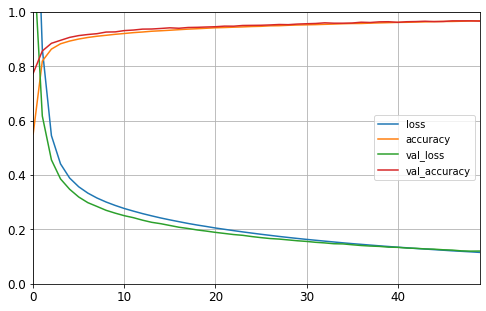

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [65]:
# The plot looks good, fine fitting.